In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_style('ticks', {'axes.grid': True})
sns.set_context('poster', font_scale=2.0)
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (12.8, 9.6)
plt.rcParams['figure.facecolor'] = 'white'


In [3]:
import pickle
import scipy.constants

In [4]:
hbarc = (scipy.constants.hbar * scipy.constants.speed_of_light
         / scipy.constants.mega / scipy.constants.electron_volt / scipy.constants.femto)

ainv = 2.333e3
lat_unit = hbarc/ainv
momega = 1.71153e3/ainv
mn = 0.95469e3/ainv
mpi = 0.146e3/ainv
L = 96
bin_num = 20

In [5]:
ls ../data

corr_jk_full_stat_20bins.pkl  n_omega_spin2_Rcorr_jk.pkl
n_omega_spin1_Rcorr_jk.pkl    n_omega_spin2_pot_av.pkl
n_omega_spin1_pot_av.pkl      n_omega_spin2_pot_jk.pkl
n_omega_spin1_pot_jk.pkl


import R-correlator

In [6]:
with open('../data/n_omega_spin2_Rcorr_jk.pkl', 'rb') as fin:
    rcorr_jk = pickle.load(fin)

In [7]:
rcorr_jk.keys()

dict_keys([10, 11, 12, 13, 14, 15])

In [8]:
rcorr_jk[10].shape

(20, 20825)

In [9]:
rs = np.array([np.sqrt(ix**2 + iy**2 + iz**2)
              for iz in range(-L//2, L//2)
              for iy in range(-L//2, L//2)
              for ix in range(-L//2, L//2)]).reshape(L, L, L)
rs = np.roll(np.roll(np.roll(rs, L//2, 0), L//2, 1), L//2, 2).flatten()
uniq_a1 = np.array([ix + L*(iy + L*iz)
                   for ix in range(0,L//2+1)
                   for iy in range(0,ix+1)
                   for iz in range(0,iy+1)])


rs_uniq = rs[uniq_a1]

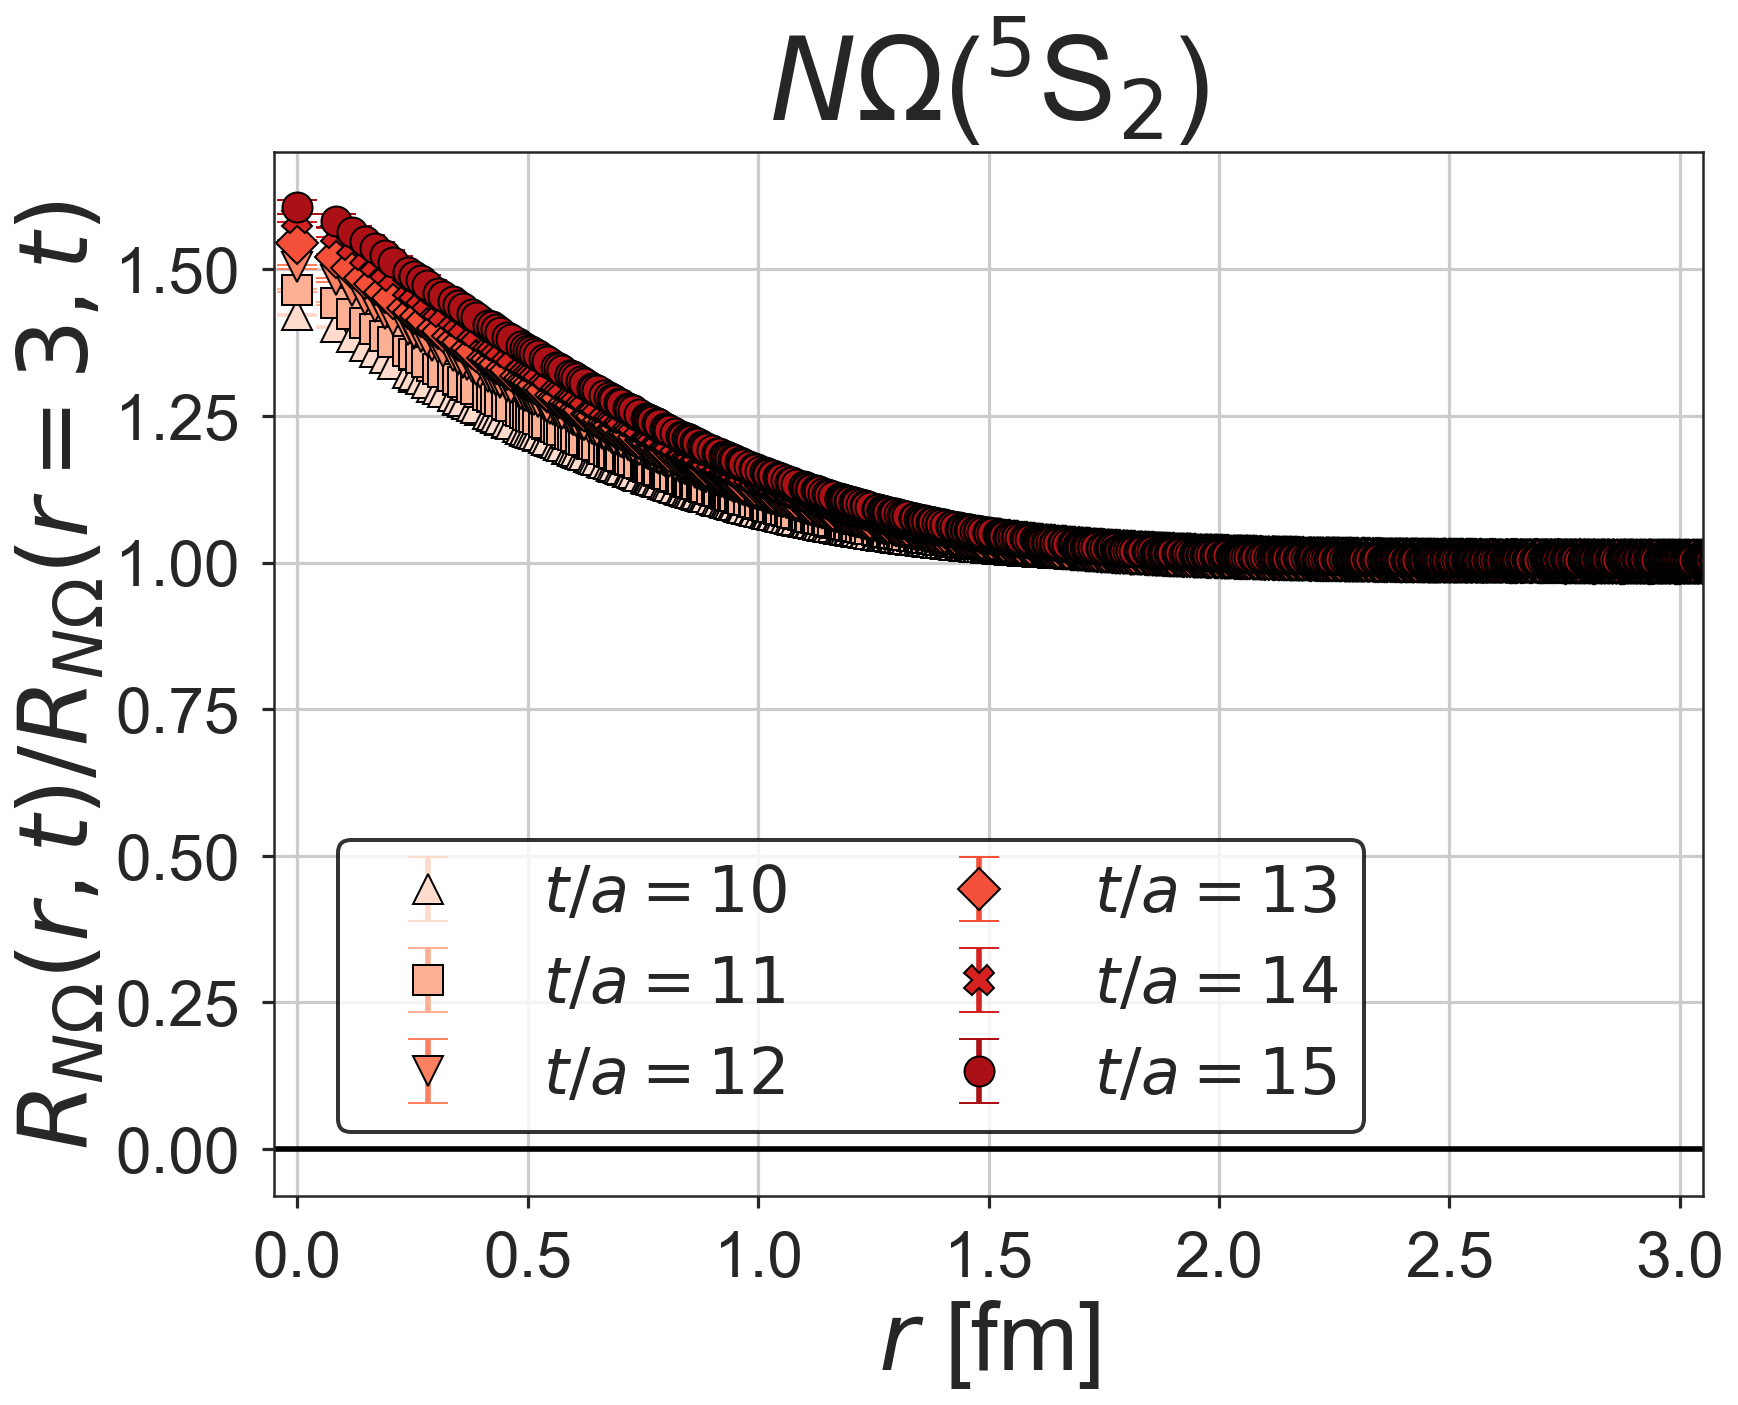

In [11]:
with sns.color_palette('Reds', len(range(10,15+1))):
    fig, ax = plt.subplots()
    ix = np.argmin(np.abs(rs_uniq*lat_unit - 3.0))
    for it, sym in zip(range(10, 15+1), ['^', 's', 'v', 'D', 'X', 'o']):
        norm = rcorr_jk[it].mean(axis=0)[ix]

        rcorr_av = (rcorr_jk[it]).mean(axis=0)/norm
        rcorr_err = (rcorr_jk[it]).std(axis=0) * np.sqrt(bin_num - 1)/norm
        r = rs[uniq_a1]
        ax.errorbar(r*lat_unit, rcorr_av, rcorr_err, fmt=sym, capsize=10, capthick=2.0,
                    mec='black', mew=1.0, ms=15,
                    label=rf'$t/a = {it}$')

    leg = ax.legend(bbox_to_anchor=(0,0), loc='lower left', borderaxespad=1, ncol=2, frameon=True)
    leg.get_frame().set_edgecolor('black')
    leg.get_frame().set_linewidth(2.0)
    ax.set_xlabel(r'$r$ [fm]', size=48)
    ax.set_ylabel(r'$R_{N\Omega}(r,t)/R_{N\Omega}(r=3,t)$', size=48)
    ax.axhline(0, color='black')
    ax.set_xlim(-0.05, 3.05)
    ax.set_title(r'$N\Omega$($^5$S$_2$)', size=58, y=1.02)
